In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import csv
import glob
import os

In [19]:
speech1 = pd.read_csv('C:/Users/Desktop/sophia/speeches_111.txt', delimiter="|", encoding='latin1', on_bad_lines='skip')
speech2 = pd.read_csv('C:/Users/Desktop/sophia/speeches_110.txt', delimiter="|", encoding='latin1', on_bad_lines='skip')
speech3 = pd.read_csv('C:/Users/Desktop/sophia/speeches_109.txt', delimiter="|", encoding='latin1', on_bad_lines='skip')
speech4 = pd.read_csv('C:/Users/Desktop/sophia/speeches_108.txt', delimiter="|", encoding='latin1', on_bad_lines='skip')
speech5 = pd.read_csv('C:/Users/Desktop/sophia/speeches_107.txt', delimiter="|", encoding='latin1', on_bad_lines='skip')



In [20]:
speakermap1 =pd.read_csv('C:/Users/Desktop/sophia/111_SpeakerMap.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
speakermap2 =pd.read_csv('C:/Users/Desktop/sophia/110_SpeakerMap.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
speakermap3 =pd.read_csv('C:/Users/Desktop/sophia/109_SpeakerMap.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
speakermap4 =pd.read_csv('C:/Users/sophia/108_SpeakerMap.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
speakermap5 =pd.read_csv('C:/Users/Desktop/sophia/107_SpeakerMap.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')

In [21]:
descr1 = pd.read_csv('C:/Users/Desktop/sophia/descr_111.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
descr2 = pd.read_csv('C:/Users/Desktop/sophia/descr_110.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
descr3 = pd.read_csv('C:/Users/Desktop/sophia/descr_109.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
descr4 = pd.read_csv('C:/Users/Desktop/sophia/descr_108.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')
descr5 = pd.read_csv('C:/Users/Desktop/sophia/descr_107.txt', delimiter="|", encoding ='unicode_escape', on_bad_lines='skip')

In [22]:
merged_speech = pd.concat([speech1, speech2, speech3, speech4, speech5], ignore_index=True)
merged_speakermap = pd.concat([speakermap1, speakermap2, speakermap3, speakermap4, speakermap5], ignore_index=True)
merged_descr = pd.concat([descr1, descr2, descr3, descr4, descr5], ignore_index =True)

In [23]:
data_m1 = pd.merge(merged_speech, merged_descr, how='outer', on='speech_id')
# Dropping rows where the 'speech' column has NaN values
data = data_m1.dropna(subset=['speech'])
# Displaying the first few rows of the cleaned dataframe to verify
data = data.drop(columns=['first_name', 'last_name', 'gender'])

In [24]:
import string

from scipy import stats
import matplotlib.pyplot as plt # for visualization

In [25]:

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VM32FZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import string
from nltk.corpus import stopwords
# Ensure 'speech' column is of string type
data['speech'] = data['speech'].astype(str)

# Define the function to remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function to the 'speech' column
data['speech'] = data['speech'].apply(remove_punctuation)

# Load and modify the stop word list
stop_words = set(stopwords.words('english'))
newStop = ['much', 'may', 'make', 'even', 'going', 'also', 'would', 'could']
for word in newStop:
    stop_words.add(word)

# Remove stop words from 'speech' column
data['speech'] = data['speech'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Remove rows with missing or empty 'speech' data
data.dropna(subset=['speech'], inplace=True)
data = data[data['speech'].str.strip().ne('')]
data

,speech_id,speech,chamber,date,number_within_file,speaker,state,line_start,line_end,file,char_count,word_count
0,1110000001,Representativeselect guests please remain stan...,None,20090106,1,The CLERK,Unknown,71,74,01062009.txt,121,18
1,1110000002,directed law capps Clerk House prepared Cardoz...,None,20090106,2,The CLERK,Unknown,83,110,01062009.txt,1008,160
2,1110000003,quorum call discloses 428 Representativeselect...,None,20090106,3,The CLERK,Unknown,566,570,01062009.txt,106,16
3,1110000004,Credentials regular form received showing elec...,None,20090106,4,The CLERK,Unknown,572,592,01062009.txt,596,92
4,1110000005,Clerk receipt letter resignation Honorable Rah...,None,20090106,5,The CLERK,Unknown,595,601,01062009.txt,200,34
...,...,...,...,...,...,...,...,...,...,...,...,...
933408,1070180721,Mr Speaker Early morning November 15 2002 Hous...,E,20021122,182,Mr. OTTER,Unknown,27931,27950,11222002.txt,878,144
933409,1070180722,Mr Speaker reluctantly voted HR 5005 Homeland ...,E,20021122,183,Mr. STUPAK,Unknown,27957,28003,11222002.txt,1831,296
933410,1070180723,Mr Speaker rise today opposition Conference Re...,E,20021122,184,Ms. McCOLLUM,Unknown,28013,28086,11222002.txt,3177,486
933411,1070180724,Mr Speaker rise speak Conference Report 1214 H...,E,20021122,185,Mr. YOUNG of Alaska,Alaska,28095,28157,11222002.txt,2212,361


In [26]:
# Merge dataset speech and speakermap
merged_df = pd.merge(merged_speech, merged_speakermap, on='speech_id')

#Get the final dataset with speech_id, speech, name, party, date, and etc (remeber to drop line with NaN)
df = pd.merge(merged_df, merged_descr, on='speech_id')
# Dropping specified columns from the dataset 'df'
df = df.drop(columns=['state_y', 'gender_x', 'district', 'nonvoting', 'line_start','line_end', 'firstname', 'lastname',
                      'char_count', 'chamber_y', 'first_name', 'last_name', 'gender_x', 'gender_y', 'chamber_x'])

# Displaying the first few rows of the cleaned dataframe to verify
df

,speech_id,speech,speakerid,state_x,party,date,number_within_file,speaker,file,word_count
0,1110000007,Our democracy renews itself every 2 years as M...,111120160,CT,D,20090106,7,Mr. LARSON of Connecticut,01062009.txt,157
1,1110000009,Madam Clerk. as chairman of the Republican Con...,111117010,IN,R,20090106,9,Mr. PENCE,01062009.txt,123
2,1110000012,MACK Ms. LEE,111113981,MO,R,20090106,12,Mrs. BONO,01062009.txt,3
3,1110000013,Madam Speaker. Leader HOYER. fellow Members. a...,111118060,OH,R,20090106,13,Mr. BOEHNER,01062009.txt,583
4,1110000014,Thank you very much. Leader BOEHNER. Together....,111120780,CA,D,20090106,14,Ms. PELOSI,01062009.txt,159
...,...,...,...,...,...,...,...,...,...,...
586153,1070180642,I thank the gentleman for yielding. Mr. Speake...,107119920,TX,D,20021122,103,Ms. JACKSON-LEE of Texas,11222002.txt,456
586154,1070180643,I thank my colleague for her lovely words. I w...,107112830,MI,D,20021122,104,Mr. BONIOR,11222002.txt,28
586155,1070180646,Mr. Speaker. first of all. I want to congratul...,107113400,GU,D,20021122,107,Mr. UNDERWOOD,11222002.txt,2653
586156,1070180648,Mr. Speaker. before we adjourn for the year. I...,107112760,TX,R,20021122,109,Mr. ARMEY,11222002.txt,29


In [5]:
pip install bertopic

     -------------------------------------- 154.1/154.1 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 163.3/163.3 kB ? eta 0:00:00
     ---------------------------------------- 85.7/85.7 kB ? eta 0:00:00
     ---------------------------------------- 5.2/5.2 MB 33.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 8.8/8.8 MB 62.8 MB/s eta 0:00:00
     ------------------------------------- 198.5/198.5 MB 16.4 MB/s eta 0:00:00
     ------------------------------------- 388.9/388.9 kB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00
     ---------------------------------------- 172.0

In [6]:
from bertopic import BERTopic

In [27]:
from sentence_transformers import SentenceTransformer
# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize BERTopic with the loaded embedding model
bert_model = BERTopic(embedding_model=model, verbose=True)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Extract year from the datetime
df['year'] = df['date'].dt.year

# Fit BERTopic to your filtered data
topics, _ = bert_model.fit_transform(df['speech'])

# Generate topics over time using only the filtered data
topics_over_time = bert_model.topics_over_time(df['speech'], df['year'], nr_bins=30)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-04-13 01:04:50,967 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/18318 [00:00<?, ?it/s]

2024-04-13 02:36:29,965 - BERTopic - Embedding - Completed ✓
2024-04-13 02:36:29,966 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-13 03:17:16,677 - BERTopic - Dimensionality - Completed ✓
2024-04-13 03:17:16,696 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-13 03:18:52,316 - BERTopic - Cluster - Completed ✓
2024-04-13 03:18:52,453 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-13 03:21:07,587 - BERTopic - Representation - Completed ✓
10it [21:37, 129.73s/it]


In [28]:
bert_model.visualize_topics_over_time(topics_over_time, top_n_topics=200)

From the general dataset named "df", I get 200 topics change over time. Among them, I read and try to find all topics that may be related to climate change, climate, and environment.

In [53]:
# Relevant topics identified
selected_topics = [1, 22, 25, 28, 67, 68, 70, 120, 166, 183, 118]

# Add the topics to the original DataFrame
df['topic'] = topics

# Filter the DataFrame for each party and the selected topics
D = df[(df['party'] == 'D') & (df['topic'].isin(selected_topics))]
R = df[(df['party'] == 'R') & (df['topic'].isin(selected_topics))]

# Now, D and R contain speeches only from the selected topics

In [54]:
D

,speech_id,speech,speakerid,state_x,party,date,number_within_file,speaker,file,word_count,year,topic
847,1110001433,Mr. President. I would like to thank Senators ...,111118701,CA,D,2009-01-11,14,Mrs. BOXER,01112009.txt,1385,2009,28
910,1110001552,Mr. President. as our economy sinks further in...,111114511,PA,D,2009-01-12,86,Mr. SPECTER,01122009.txt,559,2009,1
914,1110001556,Mr. President. I rise today to introduce. with...,111116451,WI,D,2009-01-12,90,Mr. KOHL,01122009.txt,1136,2009,1
924,1110001566,to the bill S. 22. to designate certain land c...,111120961,NV,D,2009-01-12,100,Mr. REID,01122009.txt,124,2009,28
969,1110001649,Mr. President. over the past half year. as the...,111118211,FL,D,2009-01-13,79,Mr. NELSON of Florida,01132009.txt,1938,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
585829,1070180165,Mr. President. I rise today in support of legi...,107118161,CA,D,2002-11-19,681,Mrs. FEINSTEIN,11192002.txt,437,2002,25
585830,1070180166,Mr. President. I am pleased today that the Sen...,107118701,CA,D,2002-11-19,682,Mrs. BOXER,11192002.txt,335,2002,25
585851,1070180199,As the chairman knows. we worked together on t...,107120961,NV,D,2002-11-19,715,Mr. REID,11192002.txt,363,2002,28
585852,1070180200,I do share that view and appreciate the fact t...,107116421,NM,D,2002-11-19,716,Mr. BINGAMAN,11192002.txt,22,2002,28


In [55]:
R

,speech_id,speech,speakerid,state_x,party,date,number_within_file,speaker,file,word_count,year,topic
224,1110000350,Mr. President. I am pleased to be joined by Se...,111120391,AZ,R,2009-01-06,350,Mr. MCCAIN,01062009.txt,348,2009,28
225,1110000351,Mr. President. I am pleased to be joined today...,111120391,AZ,R,2009-01-06,351,Mr. McCAIN,01062009.txt,477,2009,28
424,1110000788,Madam President. first of all. I appreciate yo...,111118351,OK,R,2009-01-08,76,Mr. INHOFE,01082009.txt,7738,2009,70
524,1110000994,Mr. President. yesterday I spent over an hour ...,111118351,OK,R,2009-01-09,30,Mr. INHOFE,01092009.txt,3054,2009,70
531,1110001008,Mr. President. these figures. particularly the...,111118261,WY,R,2009-01-09,44,Mr. BARRASSO,01092009.txt,377,2009,118
...,...,...,...,...,...,...,...,...,...,...,...,...
584534,1070178031,Madam President. I rise today. on behalf of my...,107113851,OR,R,2002-11-14,683,Mr. SMITH of Oregon,11142002.txt,304,2002,67
585623,1070179732,Madam President. the Senator is correct. I am ...,107112861,MT,R,2002-11-19,248,Mr. BURNS,11192002.txt,187,2002,67
585627,1070179736,Madam President. I would be glad to work with ...,107112861,MT,R,2002-11-19,252,Mr. BURNS,11192002.txt,85,2002,67
585795,1070180111,Mr. President. I want to take this opportunity...,107119591,IA,R,2002-11-19,627,Mr. GRASSLEY,11192002.txt,529,2002,22


In [56]:

D.to_csv('C:/Users/Desktop/sophia/D.csv', index=False)

R.to_csv('C:/Users/Desktop/sophia/R.csv', index=False)

Use LDA model to compare the two parties

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

For Democrats

In [57]:
# CountVectorizer 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(D['speech'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(X)

# Get keywords for each topic
def get_lda_topics(model, n_top_words):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [words[i] for i in top_features_ind]
        topics[topic_idx] = top_features
    return topics

n_top_words = 10
topic_keywords = get_lda_topics(lda, n_top_words)

# print the 10 topics
for topic, keywords in topic_keywords.items():
    print("Topic {}: {}".format(topic, keywords))

Topic 0: ['water', 'project', 'corps', 'projects', 'mr', 'legislation', 'river', 'resources', 'act', 'chairman']
Topic 1: ['climate', 'global', 'change', 'warming', 'emissions', 'greenhouse', 'states', 'national', 'carbon', 'act']
Topic 2: ['water', 'farmers', 'farm', 'program', 'programs', 'support', 'agriculture', 'rural', 'great', 'conservation']
Topic 3: ['energy', 'renewable', 'new', 'oil', 'fuel', 'gas', 'policy', 'tax', 'legislation', 'percent']
Topic 4: ['forest', 'wilderness', 'lands', 'forests', 'national', 'areas', 'public', 'amendment', 'act', 'federal']
Topic 5: ['national', 'park', 'land', 'mr', 'speaker', 'area', 'service', 'legislation', 'parks', 'historic']
Topic 6: ['coast', 'haiti', 'people', 'guard', 'disaster', 'federal', 'support', 'state', 'states', 'mr']
Topic 7: ['people', 'going', 'country', 'want', 'know', 'think', 'just', 'senator', 'time', 'farm']
Topic 8: ['oil', 'drilling', 'energy', 'going', 'gas', 'price', 'market', 'prices', 'drill', 'companies']
Topic

Topic 0: Water Resource Management- This topic focuses on the regulation and oversight of water-related infrastructure and projects.

Topic 1: Climate Change Policy- It deals with legislative and national initiatives aimed at addressing and mitigating climate change.

Topic 2: Agricultural Conservation- The discussion is centered on sustainable agricultural practices and environmental stewardship in rural areas.

Topic 3: Renewable Energy Policy- This topic explores the development and implementation of policies promoting renewable energy sources.

Topic 4: Forest Conservation- It concerns the protection and management of forested areas to preserve biodiversity and ecological health.

Topic 5: National Parks and Historic Preservation- The focus here is on the preservation of national parks and historic sites within these protected areas.

Topic 6: Coastal and Disaster Management- This topic addresses strategies for managing coastal regions and responding to natural disasters.

Topic 7: Public Sentiment on Environmental Policy- It reflects the general public's attitudes and opinions regarding environmental policies and their implementation.

Topic 8: Energy Markets and Drilling- The discussion revolves around the dynamics of energy markets and the implications of drilling activities.

Topic 9: Energy Prices and Economic Impact- This topic examines how fluctuations in energy prices impact the economy and influence energy policies.

In [61]:
D['year'] = pd.to_datetime(D['date']).dt.year

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(D['speech'])

In [62]:

lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
doc_topic_dist = lda_model.fit_transform(doc_term_matrix)

topic_dist_df = pd.DataFrame(doc_topic_dist)
topic_dist_df['year'] =D['year'].values

yearly_topic_dist = topic_dist_df.groupby('year').mean()


<Figure size 1500x2000 with 0 Axes>

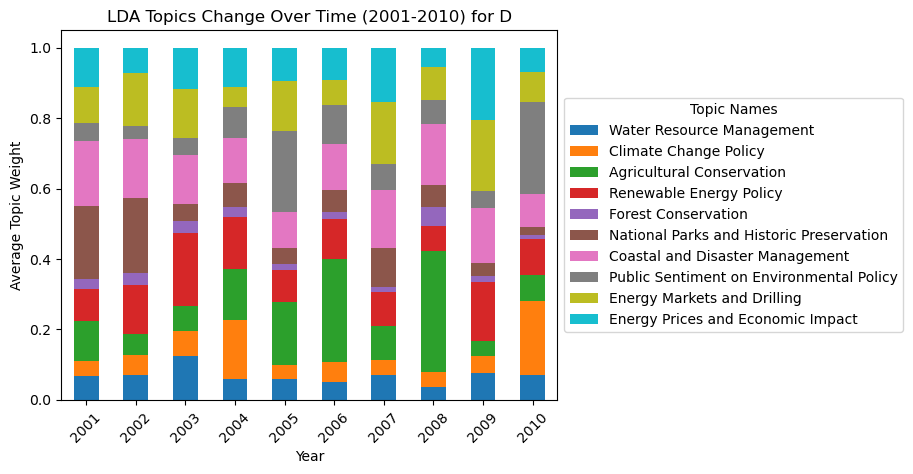

In [72]:
# Define Topic names 
topic_names = {
    0: 'Water Resource Management',
    1: 'Climate Change Policy',
    2: 'Agricultural Conservation',
    3: 'Renewable Energy Policy',
    4: 'Forest Conservation',
    5: 'National Parks and Historic Preservation',
    6: 'Coastal and Disaster Management',
    7: 'Public Sentiment on Environmental Policy',
    8: 'Energy Markets and Drilling',
    9: 'Energy Prices and Economic Impact'
}

# Visualization
plt.figure(figsize=(15, 20))
yearly_topic_dist.plot(kind='bar', stacked=True)
plt.title('LDA Topics Change Over Time (2001-2010) for D')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Average Topic Weight')
plt.legend([topic_names[i] for i in range(len(topic_names))], title='Topic Names', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



<Figure size 3000x2000 with 0 Axes>

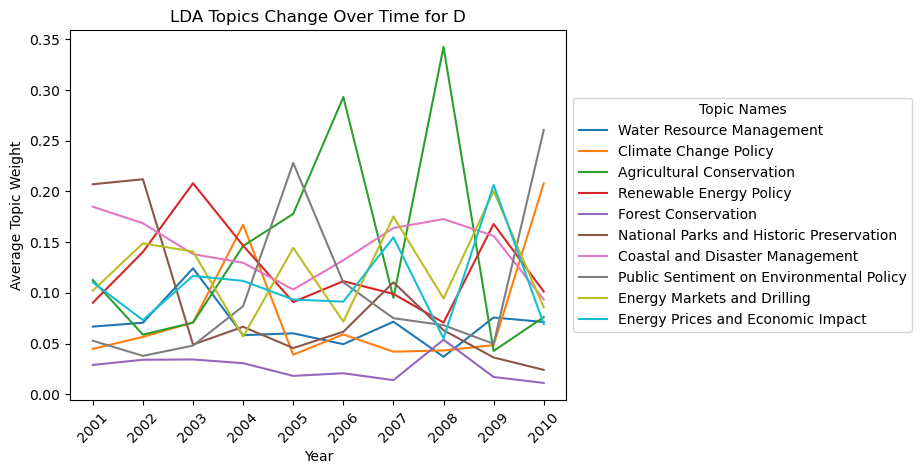

In [71]:
plt.figure(figsize=(30, 20))
ax = yearly_topic_dist.plot(kind='line') 
plt.title('LDA Topics Change Over Time for D')
plt.xlabel('Year')
plt.xticks(yearly_topic_dist.index, rotation=45)  # Ensure all years are shown as x-ticks
plt.ylabel('Average Topic Weight')
plt.legend([topic_names[i] for i in range(len(topic_names))], title='Topic Names', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

For Republican

In [73]:

# CountVectorizer 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(R['speech'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(X)

# Get keywords for each topic
def get_lda_topics(model, n_top_words):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [words[i] for i in top_features_ind]
        topics[topic_idx] = top_features
    return topics

n_top_words = 10
topic_keywords = get_lda_topics(lda, n_top_words)

# print the 10 topics
for topic, keywords in topic_keywords.items():
    print("Topic {}: {}".format(topic, keywords))

Topic 0: ['national', 'park', 'parks', 'heritage', 'trail', 'area', '000', 'service', 'mr', 'center']
Topic 1: ['farm', 'farmers', 'agriculture', 'program', 'billion', 'year', 'going', 'amendment', 'percent', 'years']
Topic 2: ['haiti', 'gulf', 'people', 'oil', 'government', 'president', 'spill', 'administration', 'bp', 'mr']
Topic 3: ['climate', 'global', 'warming', 'change', 'emissions', 'carbon', 'years', 'greenhouse', 'science', 'scientists']
Topic 4: ['water', 'coast', 'mr', 'guard', 'river', 'project', 'speaker', 'new', 'support', 'time']
Topic 5: ['forest', 'people', 'forests', 'mr', 'state', 'million', 'time', 'hurricane', 'years', 'states']
Topic 6: ['energy', 'committee', 'senate', 'policy', 'legislation', 'president', 'senator', 'amendment', 'time', 'mr']
Topic 7: ['oil', 'energy', 'gas', 'prices', 'going', 'people', 'american', 'natural', 'percent', 'price']
Topic 8: ['energy', 'oil', 'percent', 'going', 'use', 'years', 'coal', 'country', 'power', 'nuclear']
Topic 9: ['land

Topic 0: National Parks and Heritage Conservation -This topic is focused on areas designated as national parks and heritage sites, emphasizing preservation and management.

Topic 1: Agricultural Policy and Development- It covers aspects of farming and agricultural programs, reflecting on policy impacts and sector developments.

Topic 2: Environmental Disasters and Response- Keywords suggest a focus on major environmental incidents like oil spills and their management, notably the BP oil spill in the Gulf.

Topic 3: Climate Change Science and Policy- This topic directly deals with the scientific and policy dimensions of global warming and climate change.

Topic 4: Water and Coastal Management- Focuses on water-related issues including river projects and coastal management, crucial in the context of rising sea levels and climate impacts.

Topic 5: Forest Management and Disaster Response- Combines forest conservation with responses to natural disasters like hurricanes, underlining the environmental impact on forests.

Topic 6: Energy Policy and Legislation- Discusses the legislative and policy framework around energy, pivotal for shaping sustainable energy strategies.

Topic 7: Fossil Fuels and Market Dynamics- Concentrates on oil and gas, including pricing and market effects, which are significant for understanding energy economics and environmental impacts.

Topic 8: Energy Strategy and Resources- This topic highlights broader energy strategies including the use of coal, nuclear power, and other energy forms, reflecting on national energy planning and climate implications.

Topic 9: Land Management and Federal Policy- Involves the management of public lands and legislative processes, crucial for ensuring sustainable land use and conservation efforts.


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [10]:
R= pd.read_csv('C:/Users/Desktop/sophia/R.csv')

In [12]:
R['year'] = pd.to_datetime(R['date']).dt.year

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(R['speech'])

In [13]:

lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
doc_topic_dist = lda_model.fit_transform(doc_term_matrix)

topic_dist_df = pd.DataFrame(doc_topic_dist)
topic_dist_df['year'] =R['year'].values

yearly_topic_dist = topic_dist_df.groupby('year').mean()

<Figure size 1500x2000 with 0 Axes>

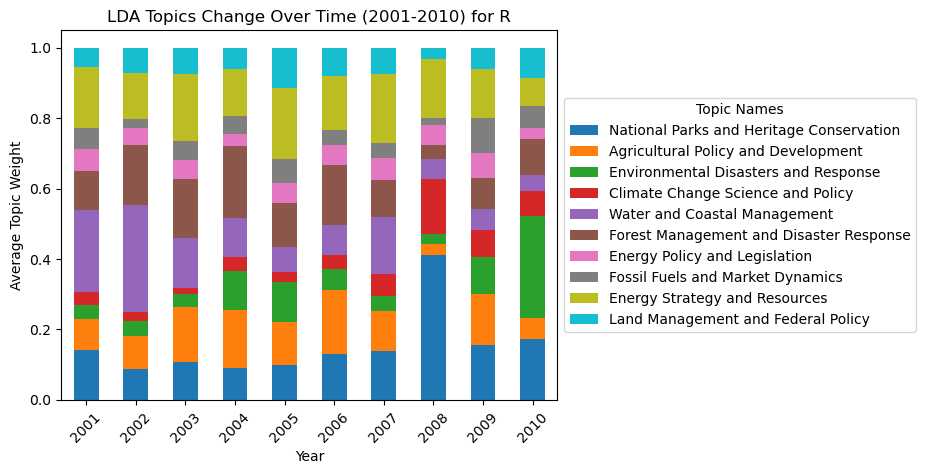

In [14]:
# Rename the topic names
topic_names = {
    0: 'National Parks and Heritage Conservation',
    1: 'Agricultural Policy and Development',
    2: 'Environmental Disasters and Response',
    3: 'Climate Change Science and Policy',
    4: 'Water and Coastal Management',
    5: 'Forest Management and Disaster Response',
    6: 'Energy Policy and Legislation',
    7: 'Fossil Fuels and Market Dynamics',
    8: 'Energy Strategy and Resources',
    9: 'Land Management and Federal Policy'
}

# Visualization
plt.figure(figsize=(15, 20))
yearly_topic_dist.plot(kind='bar', stacked=True)
plt.title('LDA Topics Change Over Time (2001-2010) for R')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Average Topic Weight')
plt.legend([topic_names[i] for i in range(len(topic_names))], title='Topic Names', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


To make sure we can observe the change more clear, I will also include a line plot.

<Figure size 3000x2000 with 0 Axes>

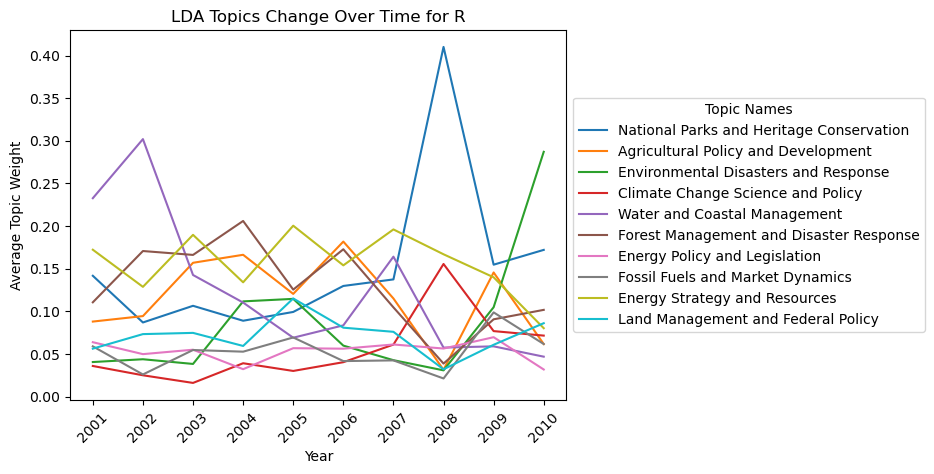

In [15]:
plt.figure(figsize=(30, 20))
ax = yearly_topic_dist.plot(kind='line') 
plt.title('LDA Topics Change Over Time for R')
plt.xlabel('Year')
plt.xticks(yearly_topic_dist.index, rotation=45)  # Ensure all years are shown as x-ticks
plt.ylabel('Average Topic Weight')
plt.legend([topic_names[i] for i in range(len(topic_names))], title='Topic Names', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [17]:
D= pd.read_csv('C:/Users/Desktop/sophia/D.csv')

In [32]:
dataframe = pd.concat([D, R], ignore_index=True)


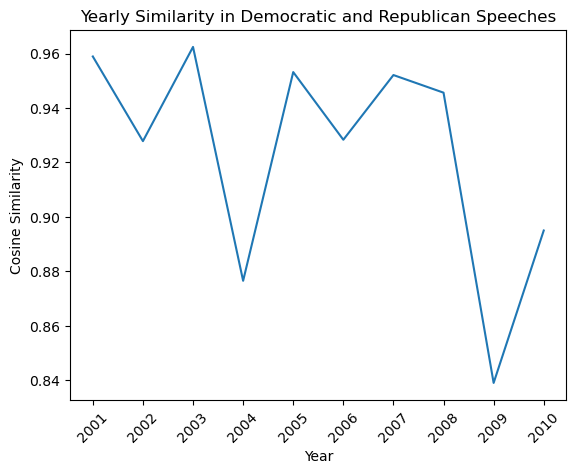

Most similar year: 2003
Least similar year: 2009


In [35]:
#Similarity Analysis
similarities = cosine_similarity(dem_vectors[common_dem_idx], rep_vectors[common_rep_idx])
plt.plot([year for year in common_years], similarities.diagonal())
plt.xlabel('Year')
plt.ylabel('Cosine Similarity')
plt.title('Yearly Similarity in Democratic and Republican Speeches')
plt.xticks([year for year in common_years], rotation=45)
plt.show()

# Analysis to find years with highest and lowest similarity
max_sim_index = similarities.diagonal().argmax()
min_sim_index = similarities.diagonal().argmin()
print(f"Most similar year: {common_years[max_sim_index]}")
print(f"Least similar year: {common_years[min_sim_index]}")

Now We find that the most similar year is 2003, and the leaset similar year is 2009. 
Then Use KWIC on the top terms for each of the periods that have the max and min for D/R similarity.

**Use KWIC to compare the two years**

find the top terms of each period and find what happened

In [41]:
import pandas as pd
import nltk
from nltk.text import Text

In [42]:
# Find indices for years 2003 and 2009 in common_years
index_2003 = common_years.get_loc(2003)
index_2009 = common_years.get_loc(2009)

# Extract the vector for the top terms
top_terms_2003 = np.argsort(np.abs(diff_vectors[index_2003]))[::-1][:10]
top_terms_2009 = np.argsort(np.abs(diff_vectors[index_2009]))[::-1][:10]

# Get the words corresponding to these top terms
words_2003 = np.array(vectorizer.get_feature_names_out())[top_terms_2003]
words_2009 = np.array(vectorizer.get_feature_names_out())[top_terms_2009]

In [44]:
import pandas as pd
import nltk
from nltk.text import Text

def prepare_text(dataframe, year):
    # Ensure the 'date' column is in datetime format
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    
    # Filter speeches by year and concatenate them into a single string
    year_speeches = dataframe[dataframe['date'].dt.year == year]['speech'].str.cat(sep=' ')
    
    # Check if there are speeches in the given year
    if year_speeches:
        # Tokenize the speeches
        tokens = nltk.word_tokenize(year_speeches)
        # Create and return an NLTK text object
        return Text(tokens)
    else:
        return None  # Return None if there are no speeches for the given year

# Ensure that nltk is properly set up (if you haven't done this already)
nltk.download('punkt')

# Prepare text objects for both parties and the specific years
dem_text_2003 = prepare_text(D, 2003)
rep_text_2003 = prepare_text(R, 2003)
dem_text_2009 = prepare_text(D, 2009)
rep_text_2009 = prepare_text(R, 2009)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VM32FZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [46]:


# Function to compute TF-IDF and return top terms
def get_top_tfidf_terms(dataframe, year, top_n=10):
    # Ensure the 'date' column is in datetime format
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    
    # Filter data for the specified year
    year_data = dataframe[dataframe['date'].dt.year == year]

    # Combine all speeches into one large string
    text_data = year_data['speech'].str.cat(sep=' ')

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    # Vectorize the text data
    tfidf_matrix = vectorizer.fit_transform([text_data])

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    # Get tfidf values
    tfidf_scores = tfidf_matrix.toarray().flatten()

    # Sort indices by score in descending order
    sorted_indices = np.argsort(tfidf_scores)[::-1]
    # Get top n feature names
    top_features = feature_names[sorted_indices][:top_n]

    return top_features

# Use the function to get top terms for each year
words_2003_dem = get_top_tfidf_terms(D, 2003, top_n=10)
words_2003_rep = get_top_tfidf_terms(R, 2003, top_n=10)
words_2009_dem = get_top_tfidf_terms(D, 2009, top_n=10)
words_2009_rep = get_top_tfidf_terms(R, 2009, top_n=10)


In [47]:
# Function to find unique terms between two lists
def find_unique_terms(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return list(set1 - set2), list(set2 - set1)

unique_2003_dem_rep, unique_2003_rep_dem = find_unique_terms(words_2003_dem, words_2003_rep)
unique_2009_dem_rep, unique_2009_rep_dem = find_unique_terms(words_2009_dem, words_2009_rep)

print("Unique 2005 Democratic Terms:", unique_2003_dem_rep)
print("Unique 2005 Republican Terms:", unique_2003_rep_dem)
print("Unique 2009 Democratic Terms:", unique_2009_dem_rep)
print("Unique 2009 Republican Terms:", unique_2009_rep_dem)

Unique 2005 Democratic Terms: ['water']
Unique 2005 Republican Terms: ['state']
Unique 2009 Democratic Terms: ['clean', 'national', 'act', 'new', 'legislation', 'oil']
Unique 2009 Republican Terms: ['going', 'climate', 'just', 'warming', 'global', 'time']


In [49]:
# Example function to display KWIC for given words in the text
def display_kwic(text, words, year, party):
    print(f"\nKWIC for {party} speeches in {year}:")
    for word in words:
        print(f"Contexts for {word}:")
        text.concordance(word)

# Assuming 'words_2003' and 'words_2009' are defined elsewhere
display_kwic(dem_text_2003, words_2003, 2003, "Democratic")


KWIC for Democratic speeches in 2003:
Contexts for energy:
Displaying 25 of 2312 matches:
raw us out of it because we are not energy independent . Oil just went up to $
 oil prices globally and we are not energy independent . we are going into hug
a leader in newfuels production and energy independence for America . in his o
trategically vulnerable . including energy . where we are totally dependent on
 do we displace particularly in the energy area the kind of imports that have 
move us into renewable resources of energy for the future . What an incredible
 America true national security and energy independence here at home . So I wa
 strategy for our country to create energy independence so that we are not so 
mic growth . that we really look at energy independence as a major pathway to 
EPA to work with the Secretaries of Energy . Commerce and Agriculture . as wel
d by 40 major companies . including energy producers such as American Electric
backCorzine amendment to the Senate ener

In [50]:
display_kwic(rep_text_2003, words_2003, 2003, "Republican")


KWIC for Republican speeches in 2003:
Contexts for energy:
Displaying 25 of 2060 matches:
ce Review was a major issue for the energy sector . In fact . I ] teld the ver
ction and more reliable and diverse energy sources . Congress and the executiv
hat we know are inevitable . Higher energy prices affect everyone . However . 
ryone . However . when the price of energy rises . that means the less fortuna
arC provided in this section of the energy antd water appropriations bill for 
this is of aid to the Department of Energy as it manages this project . It wil
tability to this important emerging energy sector . For the past several years
 the production tax credit for wind energy . Slow demand in this economic down
ver 180 megawatts of installed wind energy capacity . with another 150 megawat
ed development . The Stateline Wind Energy Project . which straddles the Orego
s . When the Senate passed national energy legislation last year . there was a
 bipartisan commitment to renewable ener

In [52]:
display_kwic(dem_text_2009, words_2009, 2009, "Democratic")


KWIC for Democratic speeches in 2009:
Contexts for energy:
Displaying 25 of 1200 matches:
 to 23 as an amendment to the Clean Energy Act . It was stripped out in confer
ne 2007 as an amendment to the 2007 Energy Bill before being stripped from tha
mmodities futures trading market on energy . it allowed them to go out and spe
wed them to go out and speculate on energy contracts . What was the first resu
in commodities . which was not only energy but agricultural commodities . all 
o stop the trading of oil and other energy commodities on the unregulated exch
waps escape regulation also allowed energy traders to conduct their business i
'' -that is a 6month period- '' the Energy Information Administration said tha
nomy . employment . education . and energy . Today I am introducing two bills 
fort : the Community Revitalization Energy Conservation . CREC . Act of 2009 a
vation . CREC . Act of 2009 and the Energy and Technology Advancement . ETA . 
lls is the Community Revitalization Ener

In [51]:
display_kwic(rep_text_2009, words_2009, 2009, "Republican")


KWIC for Republican speeches in 2009:
Contexts for energy:
Displaying 25 of 923 matches:
nd received a hearing in the Senate Energy and Natural Resources Committees Su
tration . we begin a new chapter on energy and environmental policy . and it i
nd the dawn of a new bustling green energy economy . However . before many of 
e programs is to ration fossilbased energy by making it more expensive and the
s is to ration the fossil fuelbased energy by making it more expensive to all 
to the system in the form of higher energy costs to get back an estimated $ 80
 a vital role in the debate on both energy and global warming policy . which h
trade without affecting our overall energy policy . When there are sensible pr
ucing emissions and making Americas energy supply more stable . diverse . and 
ese goals . Increasing our domestic energy production and lowering our depende
abrupt and painful increases in our energy costs in the near term ? It is all 
n University and former director of energ

Colocation

In [1]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob
import re


In [2]:
D= pd.read_csv('C:/Users/VM32FZ/OneDrive - Aalborg Universitet/Desktop/sophia/D.csv')
R= pd.read_csv('C:/Users/VM32FZ/OneDrive - Aalborg Universitet/Desktop/sophia/R.csv')
dataframe = pd.concat([D, R], ignore_index=True)

In [3]:
D['date'] = pd.to_datetime(D['date'], format='%Y-%m-%d')
D['year'] = D['date'].dt.year
D['month'] = D['date'].dt.month
D['month_year'] = D['date'].dt.to_period('M')
D['month_year'] = D['month_year'].dt.start_time
D['speech'] = D['speech'].str.lower()


In [4]:
word1 = "energy"

In [5]:
D['keywordcount'] = D['speech'].str.count(word1)
D.sort_values(by = 'keywordcount', ascending = False)

,speech_id,speech,speakerid,state_x,party,date,number_within_file,speaker,file,word_count,year,topic,month,month_year,keywordcount
6049,1070108269,mr. president. i am pleased that the senate is...,107116421,NM,D,2002-03-05,109,Mr. BINGAMAN,03052002.txt,8630,2002,1,3,2002-03-01,132
4518,1080034967,mr. president. i thank my colleague for his st...,108116421,NM,D,2003-05-06,29,Mr. BINGAMAN,05062003.txt,4781,2003,1,5,2003-05-01,108
6105,1070113876,madam president. i begin my remarks today by q...,107114621,WV,D,2002-03-21,52,Mr. BYRD,03212002.txt,3020,2002,1,3,2002-03-01,86
2365,1100172001,mr. president. day after day recordhigh oil an...,110117441,MI,D,2008-06-10,58,Mr. LEVIN,06102008.txt,5546,2008,1,6,2008-06-01,73
219,1110042645,mr. president. i rise to discuss the subject o...,111121791,OR,D,2009-05-20,324,Mr. WYDEN,05202009.txt,2475,2009,1,5,2009-05-01,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1100184024,if the senator will continue to yield for a mo...,110115351,DE,D,2008-07-15,37,Mr. BIDEN,07152008.txt,212,2008,1,7,2008-07-01,0
2658,1100184137,so. mr. president. to continue. the case is an...,110117431,LA,D,2008-07-15,150,Ms. LANDRIEU,07152008.txt,1131,2008,1,7,2008-07-01,0
2660,1100184283,mr. speaker. yesterday the president announced...,110120340,NY,D,2008-07-15,296,Mrs. MALONEY of New York,07152008.txt,167,2008,1,7,2008-07-01,0
2661,1100184285,mr. speaker. americans everywhere are fed up w...,110116560,PA,D,2008-07-15,298,Mr. ALTMIRE,07152008.txt,182,2008,1,7,2008-07-01,0


In [6]:
D['speech'].str.count(word1).sum()


19906

In [7]:
year1_d = D[D['year'] == 2003]
year2_d = D[D['year'] == 2009]

year1_d['speech'].str.count(word1, flags=re.IGNORECASE).sum()
year2_d['speech'].str.count(word1, flags=re.IGNORECASE).sum()


1248

In [8]:
import nltk
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stopwords_regex = r'\b(?:{})\b'.format('|'.join(stop))

In [9]:
year1_d_speechnumbers = year1_d['speech'].str.count(word1).nlargest(10) 
year2_d_speechnumbers = year2_d['speech'].str.count(word1).nlargest(10) 

# get the speeches that mentioned word1 the most
year1_d_context = year1_d.loc[list(year1_d_speechnumbers.index)]
year2_d_context = year2_d.loc[list(year2_d_speechnumbers.index)]
                                
# clean up the data
year1_d_context['cleanspeech'] = year1_d_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
year1_d_context['stopworded'] = year1_d_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

year2_d_context['cleanspeech'] = year2_d_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
year2_d_context['stopworded'] = year2_d_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1706507070.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  year1_d_context['cleanspeech'] = year1_d_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1706507070.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  year1_d_context['stopworded'] = year1_d_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording
C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1706507070.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  year2_d_context['cleanspeech'] = year2_d_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1706507070.py:13: FutureWarning: The default value of regex will change from True to Fal

In [12]:
year1_d_speechnumbers

4518    108
4679     66
4947     66
4696     62
4919     51
4474     50
4669     50
4608     47
4926     47
4584     42
Name: speech, dtype: int64

In [13]:
year1_d_context['speaker'][4518]

'Mr. BINGAMAN'

In [14]:
year1_d_context['speech'][4518]

'mr. president. i thank my colleague for his statement and for yielding the floor. mr.. president. today we are beginning a second attempt on the senate floorin the last congress and this congressto craft a comprehensive national energy policy. last year. as colleagues will remember. we passed an energy bill with an 81toli vote. it was bipartisan. it was. in my view. a balanced approach to energy supply. energy efficiency. and many other important issues centrally related to energy. such as climate change. this year. i first begin by congratulating senator domenici on the process he has followed and his success in getting an energy bill to the floor. we have had disagreements. and continue to have disagreements. on particular issues dealt with in the bill. but i appreciate very much the courtesy he has afforded to me and to my staff in the process he has followed in developing the bill. in spite of the process that has been followed. i fear we are beginning with a bill that does not. a

In [15]:
year2_d_speechnumbers

219    67
5      49
21     42
213    34
407    34
317    27
340    27
367    23
157    20
214    20
Name: speech, dtype: int64

In [16]:
year2_d_context['speaker'][219]

'Mr. WYDEN'

In [17]:
year2_d_context['speech'][219][:1000]

'mr. president. i rise to discuss the subject of u.s.energy policy and to introduce a series of bills to address this issue. s. 1090s. 109. americans consume too much oil. and they pay too high a price for it. national security pays a price. the environment pays a price and the economy clearly pays a price. its clear that americans can no longer afford the energy policy of the status quo. last summer. when crude oil -prices approached $150 dollars a barrel. americans were sending roughly $1.7 billion dollars a day to foreign countries to pay to cover their addiction to oil. thats $1.7 billion a day that was not invested here at home. rather it went into the pockets of oil producers in foreign countries--and often to countries that oppose americas interests and undermine american security. a third of the oil americans use comes from the opec oil cartela cartel that includes governments who are either openly hostile to the united states or who provide a haven and support to those who are

In [18]:
keyword_d_year1 = year1_d[year1_d['speech'].str.contains(word1)].copy() # search the text for the presence of our keyword 

def KWIC(body):
    n = 5 # specify the number of surrounding words to use before and after the keyword
    
    words = body.split() # split the words into tokens
    keyword_index = 0
    
    # The following for loop iterates through each word in the text. If our keyword is found, the for loop stores its index. 
    # But, why are we storing the index? As you might remember, the index is a numerical representation of the row's position.
    # It can also be thought of as a unique name the computer uses to identify a row. We can call the index to return JUST these rows.
    for index, word in enumerate(words): 
        if word1 in word: 
            keyword_index = index
            break
    
    before_keyword = words[max(0, keyword_index - n):keyword_index] # store the words that come before the keyword, up to our specified number 
    after_keyword = words[keyword_index:keyword_index + n] # store the words that come after the keyword, up to our specified number 
    return ' '.join(before_keyword + after_keyword) # return the keyword in its context

keyword_d_year1['context'] = keyword_d_year1['speech'].apply(KWIC)

In [58]:

keyword_d_year1[['context']]

,context
4378,it because we are not energy independent. oil ...
4379,for our country to create energy independence ...
4382,legislation also encourages investment in ener...
4384,work with the secretaries of energy. commerce ...
4385,north carolina does not discourage energy effi...
...,...
4947,look more carefully at the energy bill that is...
4951,the forestry subcommittee of the energy commit...
4952,on this legislation in the energy and natural ...
4967,friday i voted against the energy bill confere...


Looking for collocates over time

In [20]:
year1_d_context_count = year1_d_context["stopworded"].str.split().explode().dropna().value_counts()
year1_d_context_count[:20]

energy         572
bill           321
oil            201
new            145
would          123
us             119
gas            117
policy         105
one             95
going           93
states          86
production      85
electricity     83
need            81
use             80
america         80
way             78
people          77
want            77
fuel            73
Name: stopworded, dtype: int64

In [21]:
year2_d_context_count = year2_d_context["stopworded"].str.split().explode().dropna().value_counts()
year2_d_context_count[:20]

energy          336
would           101
renewable       100
new              89
bill             83
lands            55
clean            55
desert           54
us               53
national         52
development      50
also             46
legislation      45
solar            45
conservation     43
efficiency       43
jobs             41
areas            41
land             39
use              36
Name: stopworded, dtype: int64

In [51]:
vocab = ["efficiency", 'oil', 'technology', 'renewable']
vocabpattern = r"(?=\b("+'|'.join(vocab)+r")\b)"  
vocabpattern

'(?=\\b(efficiency|oil|technology|renewable)\\b)'

In [34]:
import nltk
from nltk.corpus import wordnet as wn
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker 

In [52]:
word1_d = D[D["speech"].str.contains(word1)]

pd.options.mode.chained_assignment = None  # default='warn'
word1_d['speech'] = word1_d['speech'].str.replace('[^\w\s]','') # strip punctuation
word1_d['speech'] = word1_d['speech'].str.lower() # lowercase
word1_d['speech'] = word1_d['speech'].str.split() # split into words

C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1573298864.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  word1_d['speech'] = word1_d['speech'].str.replace('[^\w\s]','') # strip punctuation


In [38]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VM32FZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VM32FZ\AppData\Roaming\nltk_data...


True

In [53]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

word1_d['lemmas'] = [[lemmatizer.lemmatize(word) for word in row] for row in word1_d['speech']]
word1_d['lemmas'] = [[word for word in row if word is not None] for row in word1_d['lemmas']]
word1_d['lemmas'] = [' '.join(row) for row in word1_d['lemmas']]


In [54]:
word1_d["vocab"] = word1_d["lemmas"].str.findall(vocabpattern)

vocabspeeches = word1_d[word1_d.astype(str)['vocab'] != '[]']
vocabspeeches = vocabspeeches.explode('vocab')

vocabspeeches2 = vocabspeeches[['year', 'vocab']]
vocab_per_year_d = vocabspeeches2.groupby(['year', 'vocab'])['vocab'].count()
vocab_per_year_d = pd.DataFrame(vocab_per_year_d) # convert from Series to DataFrame
vocab_per_year_d.columns = ['count'] # label the one column "count"
vocab_per_year_d = vocab_per_year_d.reset_index() # turn the multi-index into columns 'year' and 'vocab'

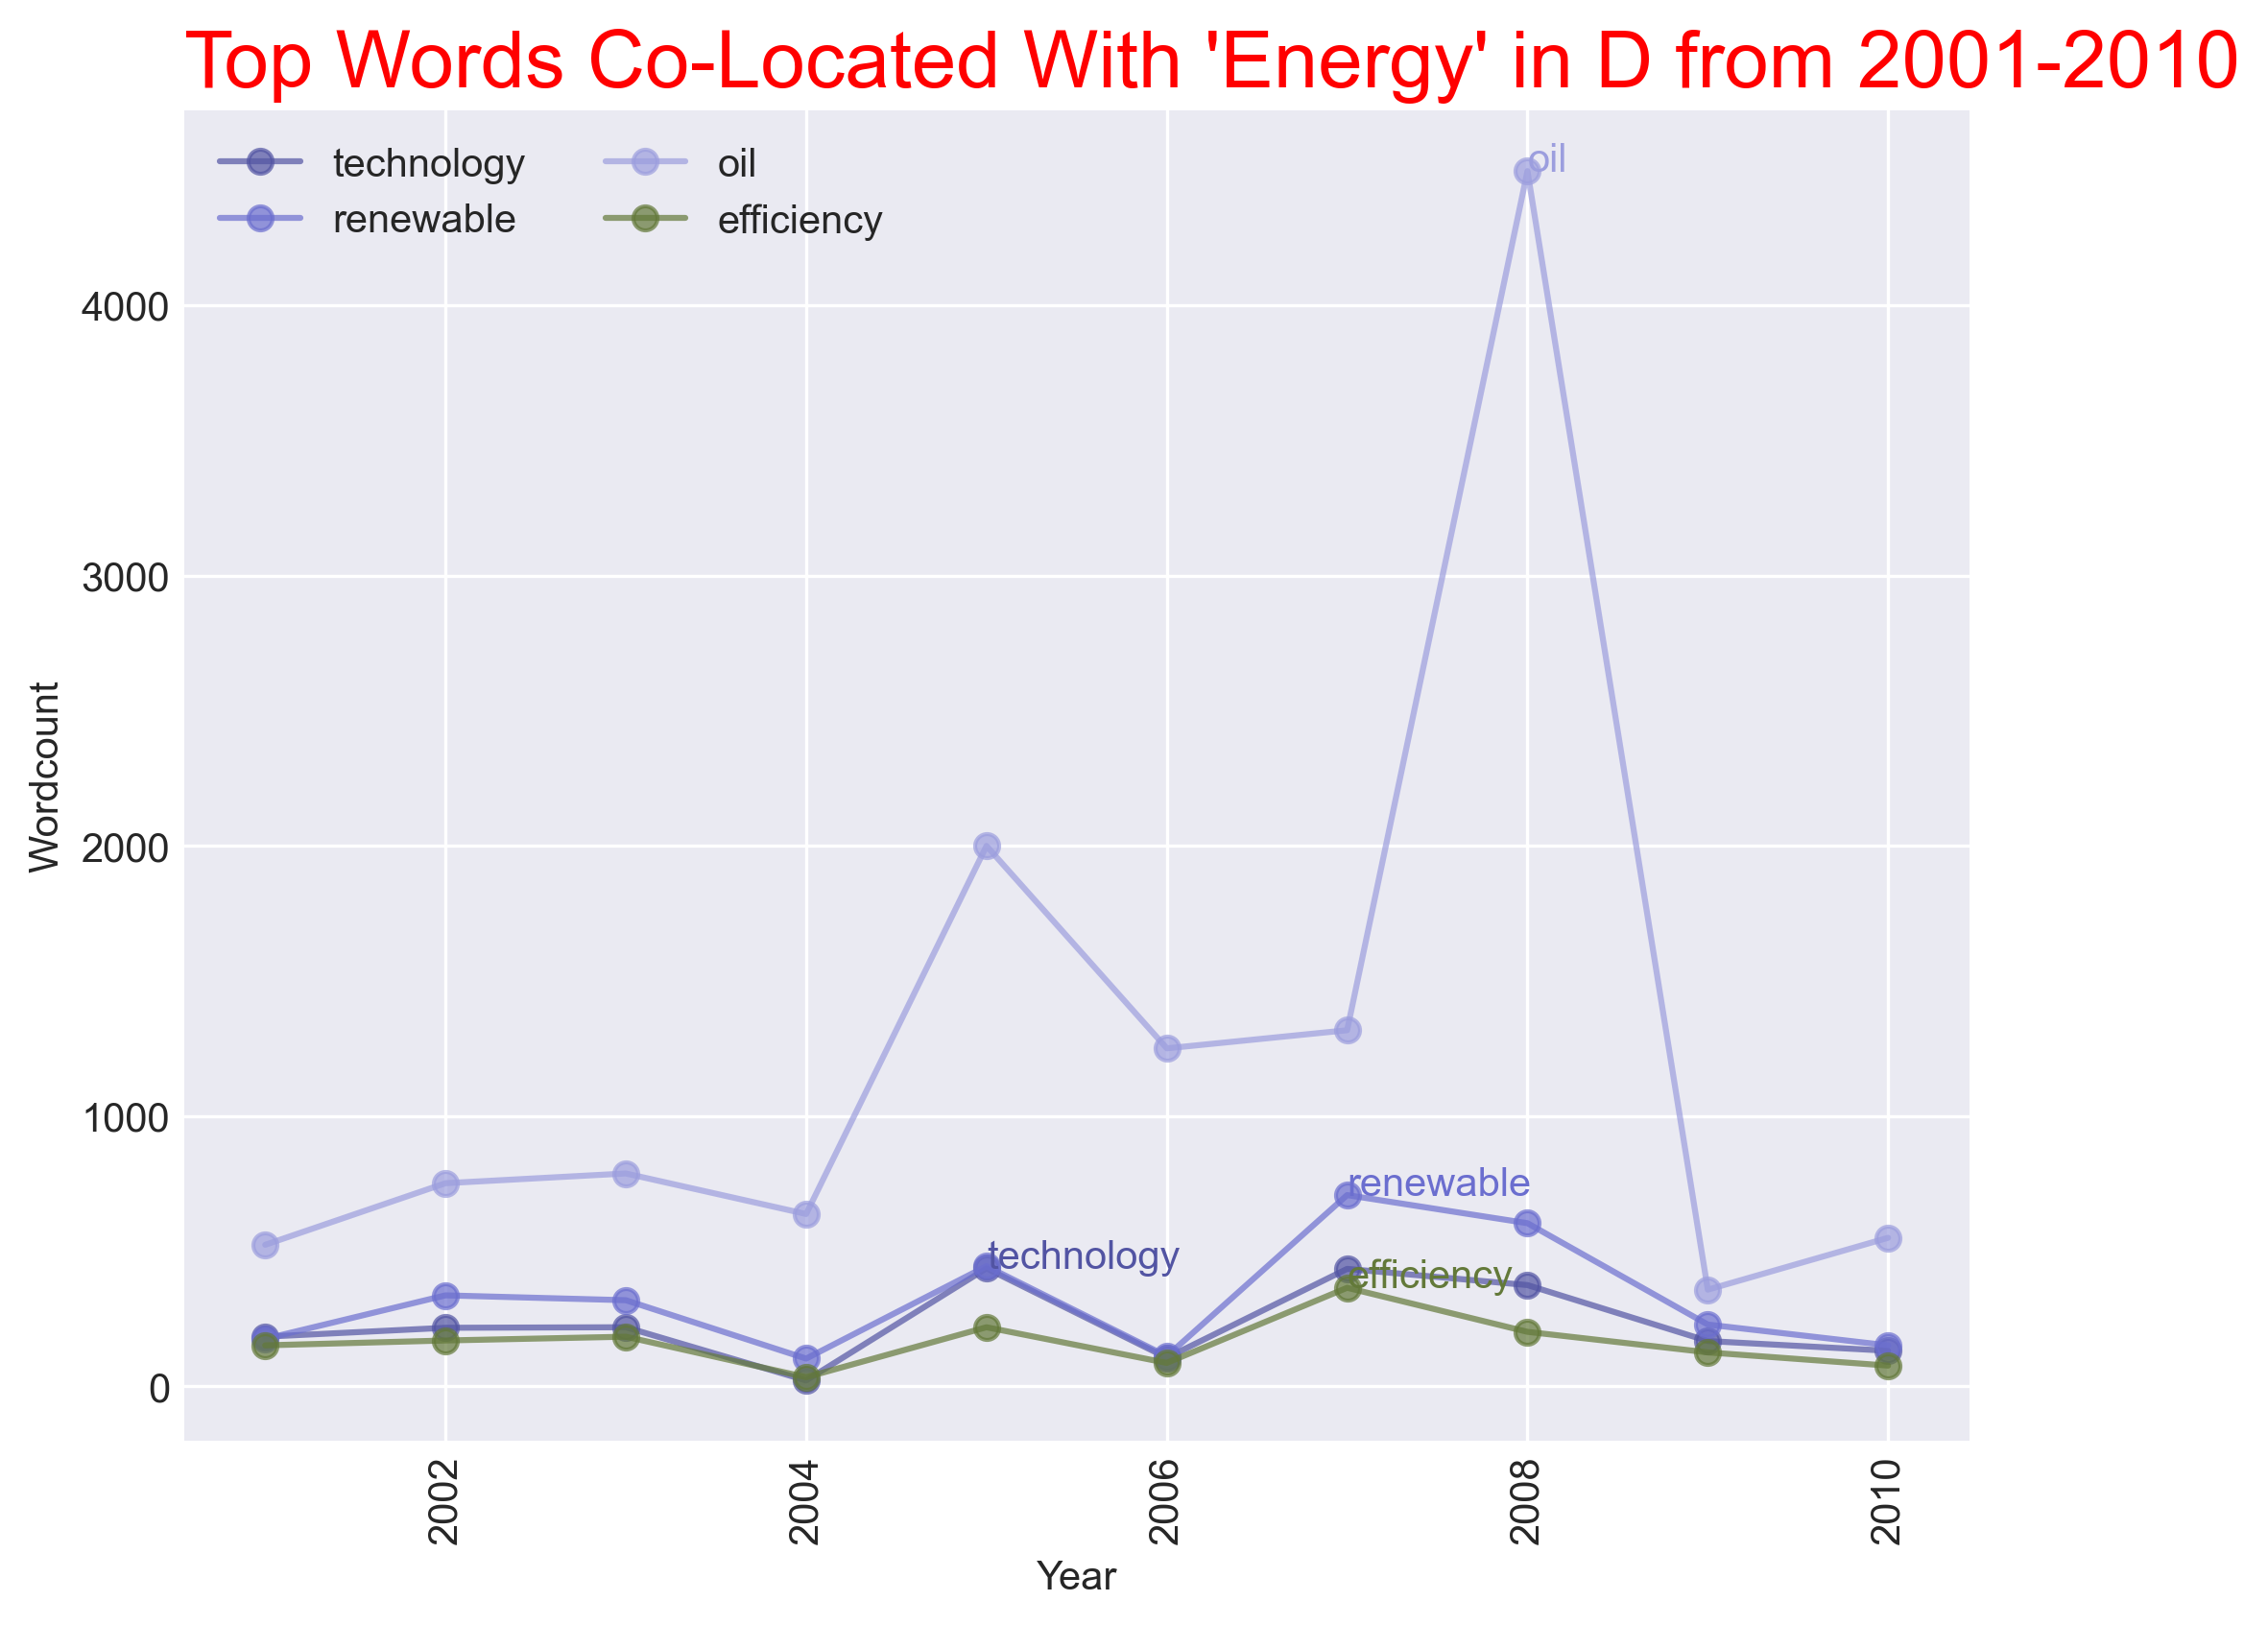

In [56]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import random


%matplotlib inline

figure(figsize=(8, 6), dpi=300)

plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('tab20b') # this tells matplotlib what colors to use.  you can play with this to change the colors.

# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(vocab_per_year_d['vocab']):
    
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(vocab_per_year_d.loc[vocab_per_year_d['vocab'] == word, 'year'], # x axis 
             vocab_per_year_d.loc[vocab_per_year_d['vocab'] == word, 'count'],  # y axis
             '-o', # make dots with lines
             color=palette(num), 
             alpha=0.7,
             label = word)
    
    # make labels
    y3 = max(vocab_per_year_d.loc[vocab_per_year_d['vocab'] == word, 'count']) # label lines at their highest point
    entity_points = vocab_per_year_d[vocab_per_year_d['vocab'] == word]
    x3 = random.choice(entity_points[entity_points['count'] == max(entity_points['count'])]['year'].tolist()) # more for finding the highest point
    plt.text(x3, y3, word, color = palette(num), size = 10) # this is the code to supply a label for each line

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Co-Located With 'Energy' in D from 2001-2010", loc='left', fontsize=20, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")
plt.show()

for R

In [22]:
R['date'] = pd.to_datetime(R['date'], format='%Y-%m-%d')
R['year'] = R['date'].dt.year
R['month'] = R['date'].dt.month
R['month_year'] = R['date'].dt.to_period('M')
R['month_year'] = R['month_year'].dt.start_time
R['speech'] = R['speech'].str.lower()

R['keywordcount'] = R['speech'].str.count(word1)
R.sort_values(by = 'keywordcount', ascending = False)

,speech_id,speech,speakerid,state_x,party,date,number_within_file,speaker,file,word_count,year,topic,month,month_year,keywordcount
4747,1070042160,mr. speaker. this evening i want to devote my ...,107113790,CO,R,2001-06-25,276,Mr. McINNIS,06252001.txt,8821,2001,1,6,2001-06-01,102
2918,1090057760,mr. speaker. if you go to your computer this e...,109116590,MD,R,2005-07-19,946,Mr. BARTLETT of Maryland,07192005.txt,9675,2005,1,7,2005-07-01,102
664,1100005972,mr. speaker. last evening we were here just ab...,110116590,MD,R,2007-01-18,530,Mr. BARTLETT of Maryland,01182007.txt,8965,2007,1,1,2007-01-01,92
1123,1100111037,mr. speaker. i rise today to address the house...,110115090,PA,R,2007-10-25,339,Mr. PETERSON of Pennsylvania,10252007.txt,6964,2007,1,10,2007-10-01,92
2725,1090029672,mr. speaker. i am pleased to rise tonight with...,109115550,MI,R,2005-05-11,411,Mr. EHLERS,05112005.txt,2253,2005,1,5,2005-05-01,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,1090160504,madam president. i appreciate the comments of ...,109118351,OK,R,2006-07-19,66,Mr. INHOFE,07192006.txt,114,2006,22,7,2006-07-01,0
1151,1100116185,mr. president. i thought i would talk about ag...,110113981,MO,R,2007-11-08,165,Mr. BOND,11082007.txt,572,2007,22,11,2007-11-01,0
3495,1090160651,the heritage foundation memo says: absent any ...,109120391,AZ,R,2006-07-19,213,Mr. McCAIN,07192006.txt,121,2006,25,7,2006-07-01,0
3496,1090160714,i am aware that section 2019 of the wrda bill ...,109118351,OK,R,2006-07-19,276,Mr. INHOFE,07192006.txt,104,2006,25,7,2006-07-01,0


In [23]:
year1 = R[R['year'] == 2003]
year2 = R[R['year'] == 2009]

year1['speech'].str.count(word1, flags=re.IGNORECASE).sum()
year2['speech'].str.count(word1, flags=re.IGNORECASE).sum()

945

In [24]:
year1_r_speechnumbers = year1['speech'].str.count(word1).nlargest(10) 
year2_r_speechnumbers = year2['speech'].str.count(word1).nlargest(10) 

# get the speeches that mentioned word1 the most
year1_r_context = year1.loc[list(year1_r_speechnumbers.index)]
year2_r_context = year2.loc[list(year2_r_speechnumbers.index)]
                                
# clean up the data
year1_r_context['cleanspeech'] = year1_r_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
year1_r_context['stopworded'] = year1_r_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

year2_r_context['cleanspeech'] = year2_r_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
year2_r_context['stopworded'] = year2_r_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1101855821.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  year1_r_context['cleanspeech'] = year1_r_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1101855821.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  year1_r_context['stopworded'] = year1_r_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording
C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1101855821.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  year2_r_context['cleanspeech'] = year2_r_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\1101855821.py:13: FutureWarning: The default value of regex will change from True to Fal

In [25]:
year1_r_speechnumbers

3786    63
4208    55
4209    49
3781    48
3956    33
4196    32
3780    31
4180    30
3787    27
3855    27
Name: speech, dtype: int64

In [27]:
year1_r_context['speaker'][3786]

'Mr. CRAIG'

In [26]:
year1_r_context['speech'][3786]

'mr. president. i am here this morning to speak to the bill that is now before us. s. 14. brought to the floor yesterday by senator pete domenici. the chairman of the energy and natural resources committee of our senate. it is a work product that a good many of us have been involved in -for well over 3 years. in looking at the issue prior to the bush administrlation coming to town and certainly with the initiative of the bush administration to recognize the need for a national energy policy and to produce for us an outline of their vision of a national policy and asking the congress to work its will over the last good number of years to produce that policy. of course. that came in the backdrop of brownouts and blackouts in california. of a jigsaw or certainly unprecedented ties or ups and downs in the gas markets of our country and a real recognition that over the last good number of decades the congress of the united states and our government had not minded the energy store of our cou

In [57]:
year2_r_speechnumbers

177    76
79     36
112    34
87     31
113    31
173    28
228    27
80     26
125    26
186    24
Name: speech, dtype: int64

In [28]:
year2_r_context['speaker'][177]

'Mr. VITTER'

In [29]:
year2_r_context['speech'][177]

'madam president. i rise today to talk about the crucial issue of energy. to express real and deep concern that president obamas energy proposals are. pure and simple. a huge package of new taxes on domestic energy production that will hurt this country and particularly hurt middleclass and workingclass families. and to offer a clear alternative which is embodied in a bill i have introduced with 14 other senators and 30 house members. the no cost stimulus act of energy plays a very unique and important role in our great society because energyaffordable. accessible energyis one of the great equalizers in our great society. lowcost energy provides for the single mom working two jobs to be able to drive her kids to school in the morning or soccer practice on the weekend. the way a wealthy family can.- lowcost energy allows for an elderly couple living on social secu\x95rity to stay warm in the winter and cool in the summer. as warren buffett can. in providing energy that is truly affordab

Looking for collocates over time

In [59]:
# count the other words that appear in the context of word1 in 2003 for R
year1_context_count_r = year1_r_context["stopworded"].str.split().explode().dropna().value_counts()
year1_context_count_r[:30]

energy         383
bill           147
gas             88
new             73
production      72
us              69
policy          68
country         67
coal            65
natural         65
need            64
jobs            63
oil             61
renewable       60
one             60
get             60
committee       57
use             57
going           56
fuel            56
economy         52
nuclear         50
legislation     48
clean           47
also            46
good            45
time            45
years           44
electricity     44
fuels           43
Name: stopworded, dtype: int64

In [60]:
year2_context_count_r = year2_r_context["stopworded"].str.split().explode().dropna().value_counts()
year2_context_count_r[:30]

energy         330
nuclear         69
american        66
tax             66
going           59
would           59
jobs            58
new             56
percent         53
bill            44
cost            42
one             42
domestic        40
oil             40
us              38
people          37
electricity     37
gas             37
economy         36
production      34
president       34
need            32
costs           31
country         31
resources       31
make            30
clean           30
billion         29
way             28
increase        28
Name: stopworded, dtype: int64

In [92]:
vocab_r = ['job', "tax", 'gas', 'nuclear']
import re 
vocabpattern_r = r"(?=\b("+'|'.join(vocab_r)+r")\b)"  
vocabpattern_r

'(?=\\b(job|tax|gas|nuclear)\\b)'

In [93]:
word1_r = R[R["speech"].str.contains(word1)]

pd.options.mode.chained_assignment = None  # default='warn'
word1_r['speech'] = word1_r['speech'].str.replace('[^\w\s]','') # strip punctuation
word1_r['speech'] = word1_r['speech'].str.lower() # lowercase
word1_r['speech'] = word1_r['speech'].str.split() # split into words

C:\Users\VM32FZ\AppData\Local\Temp\ipykernel_16024\130899018.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  word1_r['speech'] = word1_r['speech'].str.replace('[^\w\s]','') # strip punctuation


In [94]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VM32FZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VM32FZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [95]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

word1_r['lemmas'] = [[lemmatizer.lemmatize(word) for word in row] for row in word1_r['speech']]
word1_r['lemmas'] = [[word for word in row if word is not None] for row in word1_r['lemmas']]
word1_r['lemmas'] = [' '.join(row) for row in word1_r['lemmas']]

In [96]:
word1_r["vocab_r"] = word1_r["lemmas"].str.findall(vocabpattern_r)

In [97]:
vocabspeeches_r = word1_r[word1_r.astype(str)['vocab_r'] != '[]']
vocabspeeches_r = vocabspeeches_r.explode('vocab_r')

In [98]:
vocabspeeches2_r = vocabspeeches_r[['year', 'vocab_r']]
vocab_per_year_r = vocabspeeches2_r.groupby(['year', 'vocab_r'])['vocab_r'].count()
vocab_per_year_r = pd.DataFrame(vocab_per_year_r) # convert from Series to DataFrame
vocab_per_year_r.columns = ['count'] # label the one column "count"
vocab_per_year_r = vocab_per_year_r.reset_index() # turn the multi-index into columns 'year' and 'vocab'

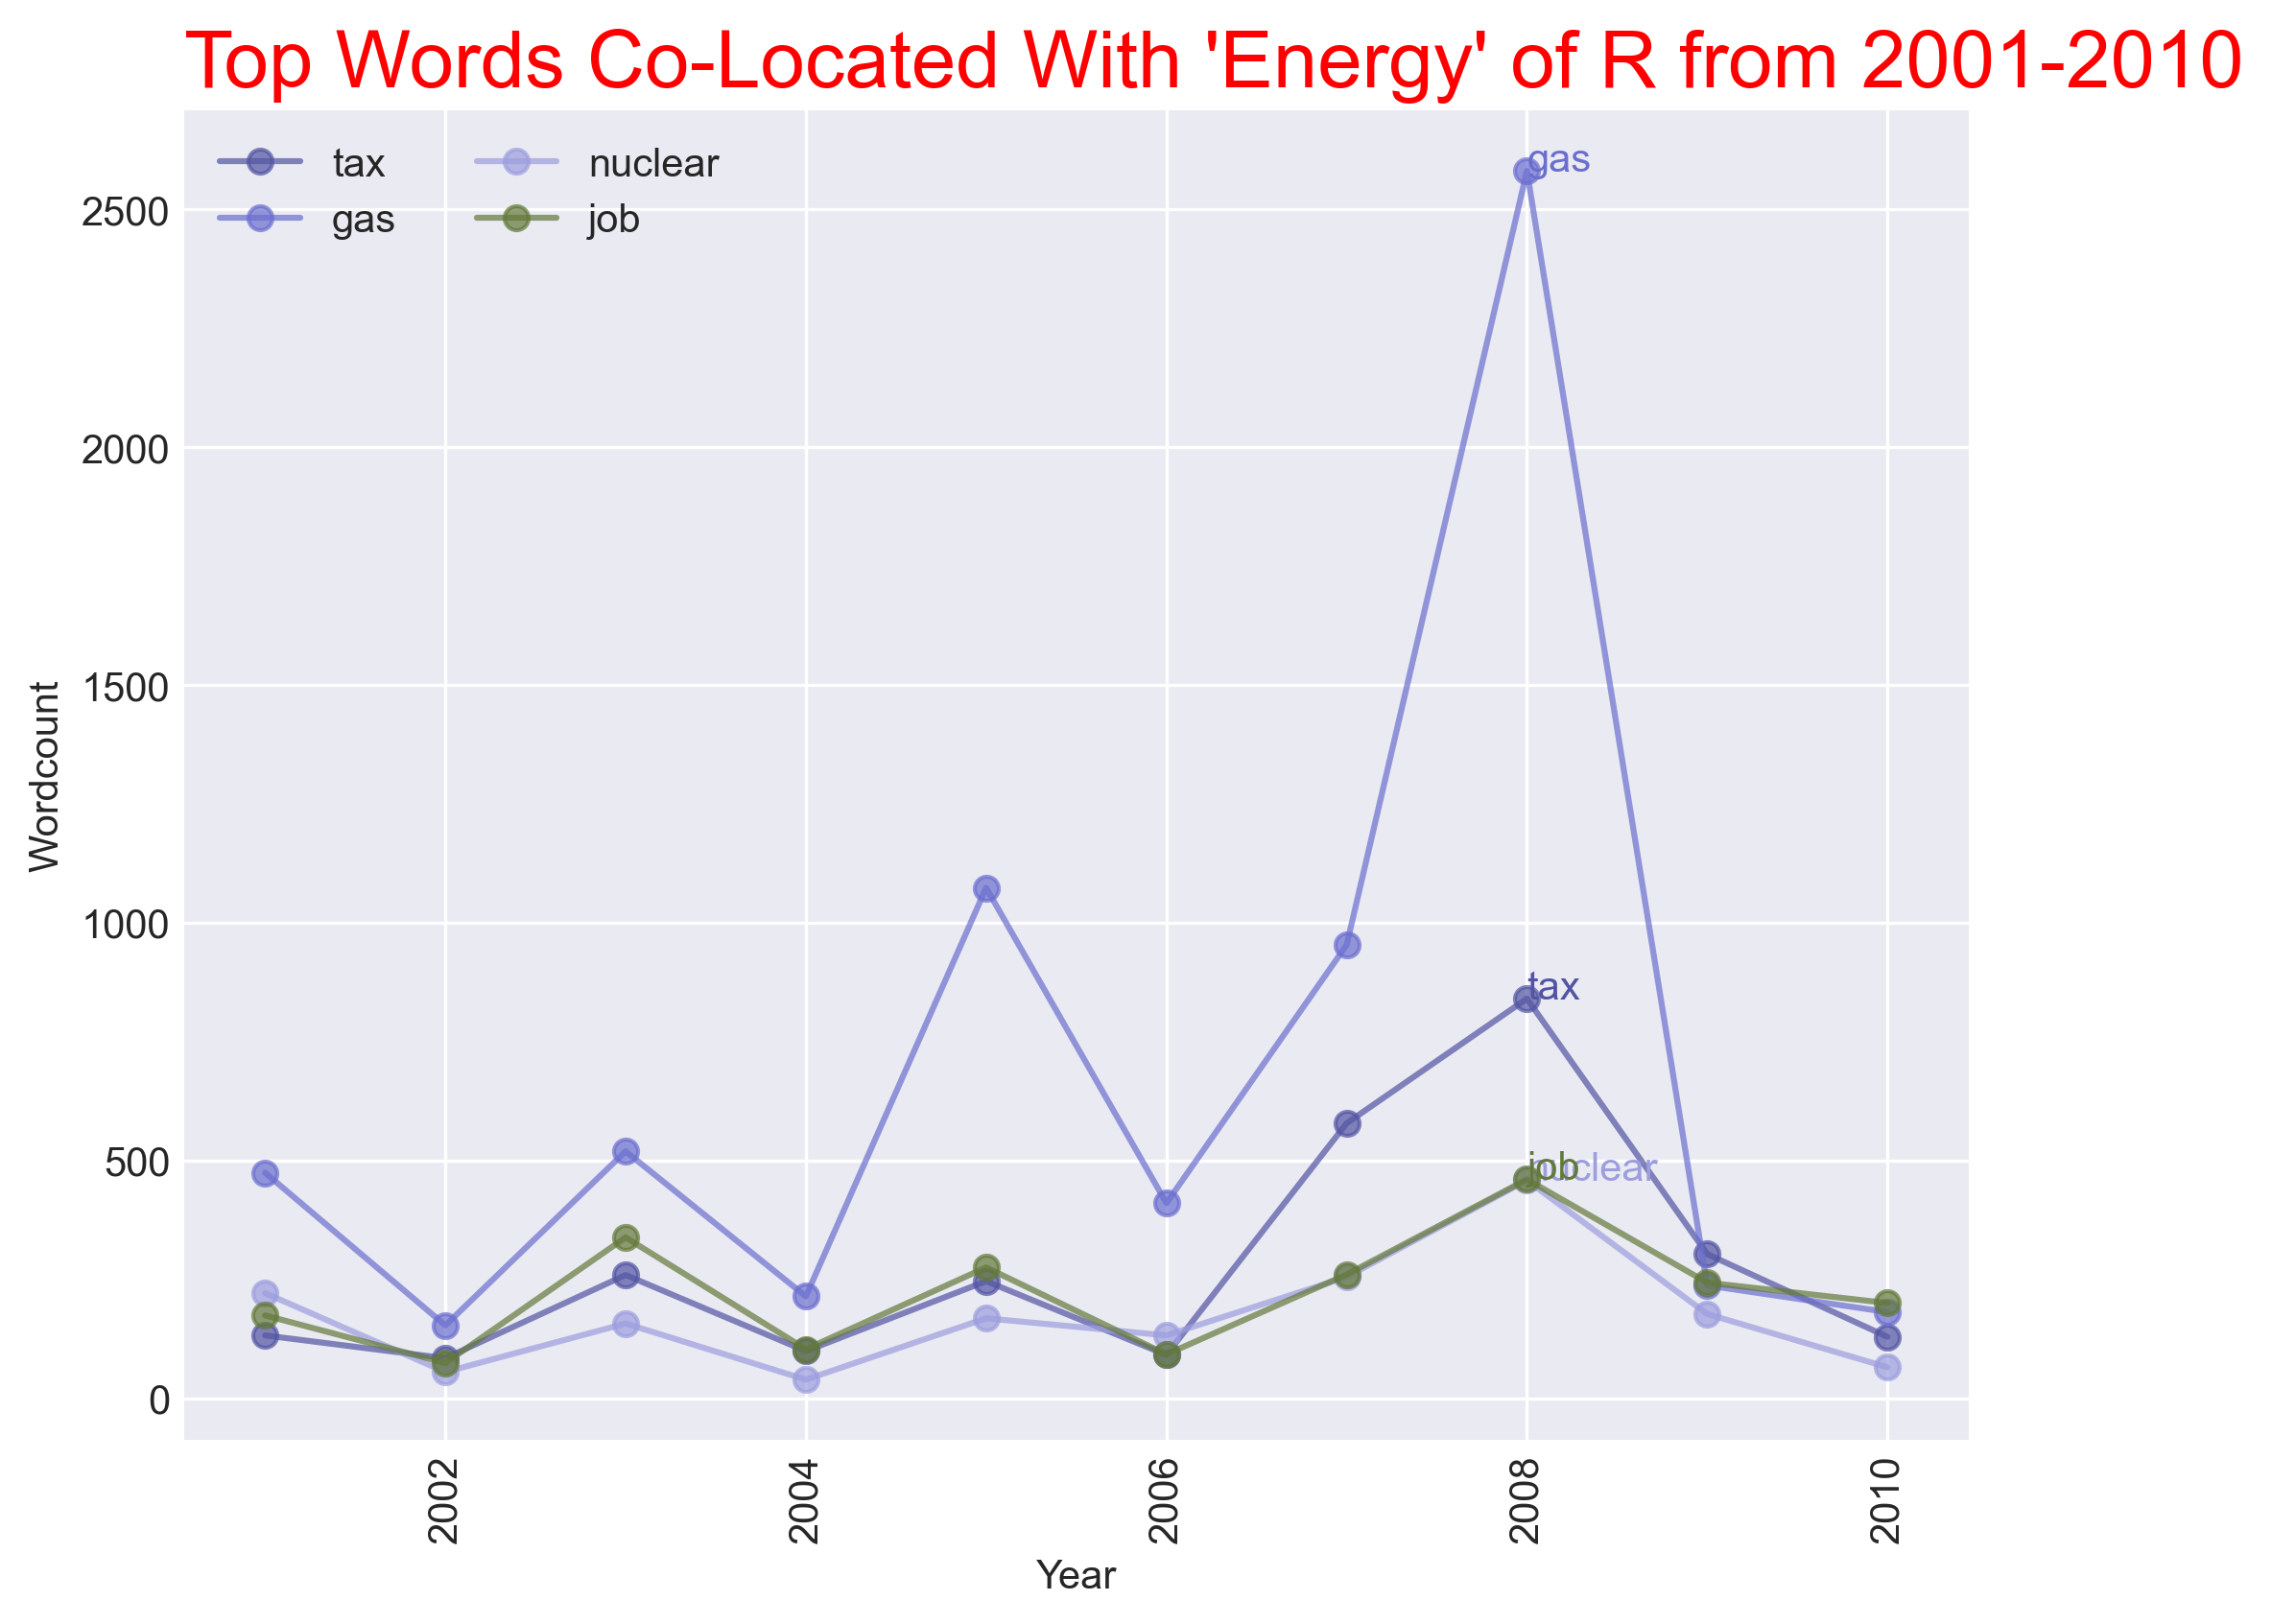

In [99]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import random


%matplotlib inline

figure(figsize=(8, 6), dpi=300)

plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('tab20b') # this tells matplotlib what colors to use.  you can play with this to change the colors.

# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(vocab_per_year_r['vocab_r']):
    
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(vocab_per_year_r.loc[vocab_per_year_r['vocab_r'] == word, 'year'], # x axis 
             vocab_per_year_r.loc[vocab_per_year_r['vocab_r'] == word, 'count'],  # y axis
             '-o', # make dots with lines
             color=palette(num), 
             alpha=0.7,
             label = word)
    
    # make labels
    y3 = max(vocab_per_year_r.loc[vocab_per_year_r['vocab_r'] == word, 'count']) # label lines at their highest point
    entity_points = vocab_per_year_r[vocab_per_year_r['vocab_r'] == word]
    x3 = random.choice(entity_points[entity_points['count'] == max(entity_points['count'])]['year'].tolist()) # more for finding the highest point
    plt.text(x3, y3, word, color = palette(num), size = 10) # this is the code to supply a label for each line


             
    
# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Co-Located With 'Energy' of R from 2001-2010", loc='left', fontsize=20, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")
plt.show()